## Проверка статистической значимости: практическая часть
### F-критерий Фишера

In [15]:
#!/usr/local/bin/python3
# -*- coding: utf-8 -*-
from time import time
import numpy as np
from scipy.stats import f_oneway

np.random.seed(int(time())) 
series_1 = (np.random.rand(50)*100).astype(int) 
series_2 = (np.random.normal(size=50)*100).astype(int) 
alpha = 0.05 
p_value = f_oneway(series_1, series_2)[1] 
print('{} the H0: Var(X1) == Var(X2)\n'.format( {False:'Reject', True:'Confirm'}[p_value > alpha]))


Reject the H0: Var(X1) == Var(X2)



In [27]:
series_1 = (np.random.rand(50)*100).astype(int) 
series_2 = (np.random.normal(size=50)*1000+400).astype(int) 

p_value = f_oneway(series_1, series_2)[1] 
print('{} the H0: Var(X1) == Var(X2)\n'.format( {False:'Reject', True:'Confirm'}[p_value > alpha]))


Reject the H0: Var(X1) == Var(X2)



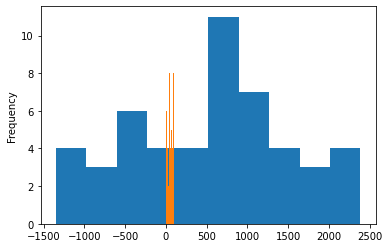

In [31]:
pd.Series(series_2).plot.hist()
pd.Series(series_1).plot.hist()
plt.show()

<AxesSubplot:ylabel='Frequency'>

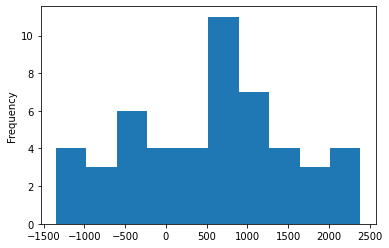

In [29]:
pd.Series(series_2).plot.hist()

### Критерий Бартлетта

In [39]:
#!/usr/local/bin/python3
# -*- coding: utf-8 -*-

import numpy as np
from scipy.stats import bartlett

alpha = 0.05 

def bartlett_test(df1, df2, df3, p_value = alpha): 
	st = bartlett(df1, df2, df3) 
	print(st)
	print('Variances of distributions is {}equal\n'.format( {True:'not ', False:''}[st[1] < p_value]))

series_1 = (np.random.rand(50)*100).astype(int) 
series_2 = (np.random.normal(size=50)*100).astype(int)
shape, scale = 2., 2. # mean=4, std=2*sqrt(2) 
series_3 = (np.random.gamma(shape, scale, 100)).astype(int) 

bartlett_test(series_1, series_2, series_3)


BartlettResult(statistic=565.7176523941431, pvalue=1.4320976265734279e-123)
Variances of distributions is not equal



In [36]:
bartlett_test(series_1, series_1, series_1)

Variances of distributions is equal



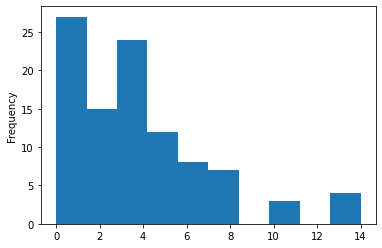

In [34]:
# pd.Series(series_2).plot.hist()
# pd.Series(series_1).plot.hist()
pd.Series(series_3).plot.hist()
plt.show()

### Критерий Левена

In [3]:
#!/usr/local/bin/python3
# -*- coding: utf-8 -*-

import numpy as np
from scipy.stats import levene

alpha = 0.05 

def levene_test(df1, df2, df3, p_value = alpha): 
	st = levene(df1, df2, df3) 
	print('Variances of distributions is {}equal\n'.format( {True:'not ', False:''}[st[1] < p_value]))

series_1 = (np.random.rand(50)*100).astype(int) 
series_2 = (np.random.normal(size=50)*100).astype(int)
shape, scale = 2., 2. # mean=4, std=2*sqrt(2) 
series_3 = (np.random.gamma(shape, scale, 100)).astype(int) 

levene_test(series_1, series_2, series_3)


Variances of distributions is not equal



In [41]:
series_2 = (np.random.normal(size=50)*100).astype(int)
levene_test(series_2, series_2, series_2)

Variances of distributions is equal



### Критерий Колмогорова-Смирнова

In [43]:
#!/usr/local/bin/python3
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from scipy.stats import kstest

alpha = 0.05

series = (np.random.normal(size=50)*100).astype(int) 
st = kstest(pd.Series(series), 'norm')

print('Distributions is {}normal\n'.format( {False:'not ', True:''}[st[1] < alpha]))

Distributions is normal



### Критерий Шапиро

In [44]:
#!/usr/local/bin/python3
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from scipy.stats import shapiro

alpha = 0.05

series = (np.random.normal(size=50)*100).astype(int) 
st = shapiro(pd.Series(series))

print('Distributions is {}normal\n'.format( {True:'not ', False:''}[st[1] < alpha]))


Distributions is normal



### T-критерий Стьюдента: scipy.stats.ttest_ind

In [6]:
#!/usr/local/bin/python3 # -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
alpha = 0.05
series1 = (np.random.normal(size=50)*100).astype(int) 
series2 = (np.random.normal(size=50)*100).astype(int) 
st = ttest_ind(pd.Series(series1), pd.Series(series2))
 
print('Diffs is {}significant\n'.format( {False:'not ',
True:''}[st[1] < alpha])) 
print(st[1], alpha)

Diffs is not significant

0.837335507774107 0.05


(array([1., 4., 1., 6., 9., 7., 9., 5., 6., 2.]),
 array([-249. , -204.2, -159.4, -114.6,  -69.8,  -25. ,   19.8,   64.6,
         109.4,  154.2,  199. ]),
 <BarContainer object of 10 artists>)

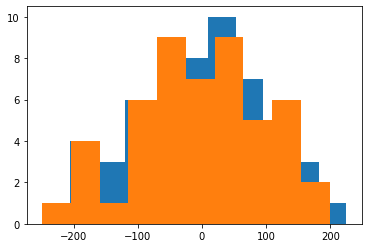

In [7]:
plt.hist(series2)
plt.hist(series1)

### U-критерий Манна-Уитни: scipy.stats.mannwhitneyu

In [8]:
#!/usr/local/bin/python3 # -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
alpha = 0.05
series1 = (np.random.gamma(2, 2, 50)*100).astype(int) 
series2 = (np.random.gamma(2, 2, 50)*100).astype(int)
st = mannwhitneyu(pd.Series(series1), pd.Series(series2))
 
print('Diffs is {}significant\n'.format( {False:'not ',
True:''}[st[1] < alpha])) 
print(st[1], alpha)

Diffs is not significant

0.49587462017062295 0.05


In [47]:
series1 = (np.random.gamma(2, 2, 50)*100).astype(int) 
series2 = (np.random.gamma(2, 2, 50)*100).astype(int)
st = mannwhitneyu(pd.Series(series1), pd.Series(series2))
 
print('Diffs is {}significant\n'.format( {False:'not ',
True:''}[st[1] < alpha])) 
print(st[1], alpha)

Diffs is not significant

0.33077625754280754 0.05


(array([12., 14.,  5.,  8.,  2.,  4.,  3.,  1.,  0.,  1.]),
 array([  97. ,  228.1,  359.2,  490.3,  621.4,  752.5,  883.6, 1014.7,
        1145.8, 1276.9, 1408. ]),
 <BarContainer object of 10 artists>)

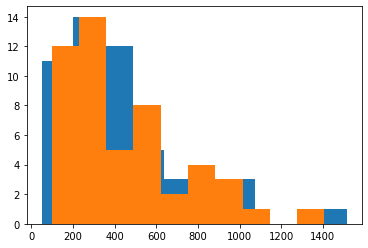

In [48]:
plt.hist(series2)
plt.hist(series1)

(array([12., 15., 13.,  4.,  2.,  2.,  0.,  1.,  0.,  1.]),
 array([   8. ,  200.7,  393.4,  586.1,  778.8,  971.5, 1164.2, 1356.9,
        1549.6, 1742.3, 1935. ]),
 <BarContainer object of 10 artists>)

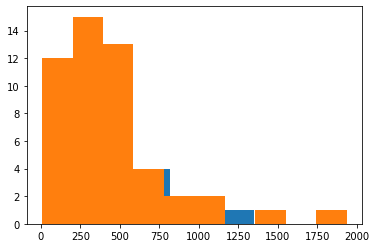

In [9]:
plt.hist(series2)
plt.hist(series1)

### Расчёт необходимого объёма выборки для t-критерия Стьюдента

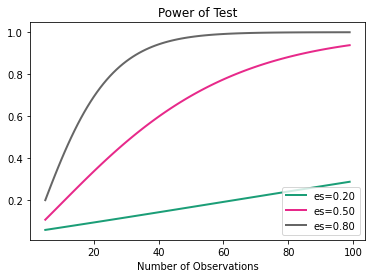

In [10]:
#!/usr/local/bin/python3 # -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.power import TTestIndPower
# calculate power curves
# for varying sample and effect size 
analysis = TTestIndPower() 
fig = analysis.plot_power(nobs=np.arange(5, 100), effect_size=np.array([0.2, 0.5, 0.8]))

In [11]:
#!/usr/local/bin/python3 # -*- coding: utf-8 -*-
import numpy as np
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.08
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result) 

Sample Size: 2453.730
